In [1]:
import pandas as pd

In [2]:
fact = pd.read_csv('flights_fact.csv', usecols=['AIRLINE', 'scheduledDeparture_key', 
                                                'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY',
                                               'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'dateKey',
                                               'TAIL_NUMBER', 'DEPARTURE_DELAY', 'scheduledArrival_key',
                                               'SCHEDULED_TIME'], 
                   dtype={'dateKey':'str'})

/var/folders/v7/cd7r3hf1229b9tnytv_qr8hm0000gn/T/ipykernel_87352/27482444.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  fact = pd.read_csv('flights_fact.csv', usecols=['AIRLINE', 'scheduledDeparture_key',


In [3]:
aircraft = pd.read_csv('aircraft_dim.csv', usecols=['N-Number', 'num_passengers', 'mfr_name'])
aircraft.sample(3)

,N-Number,mfr_name,num_passengers
3244,N27901,BOEING,260
1885,N133SY,EMBRAER S A,88
2452,N984DL,MCDONNELL DOUGLAS AIRCRAFT CO,142


In [4]:
airport = pd.read_csv('departureAirport_dim.csv', usecols=['IATA_CODE', 'STATE'])
date = pd.read_csv('date_dim.csv', usecols=['dateKey', 'MONTH', 'DAY'], dtype={'dateKey':'str'})
time1 = pd.read_csv('departureTime_dim.csv', usecols=['Hour', 'Minute', 'scheduledDeparture_key'])
time2 = pd.read_csv('arrivalTime_dim.csv', usecols=['Hour', 'Minute', 'scheduledArrival_key'])

In [5]:
fact = pd.merge(fact, aircraft, left_on='TAIL_NUMBER', right_on='N-Number')
fact = pd.merge(fact, airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
fact = pd.merge(fact, airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
fact = pd.merge(fact, date, left_on='dateKey', right_on='dateKey')
fact = pd.merge(fact, time1, on='scheduledDeparture_key')
fact = pd.merge(fact, time2, on='scheduledArrival_key')

In [6]:
fact['ORIGIN_AIRPORT'].value_counts()

ATL    303120
DEN    161802
LAX    144146
ORD    143459
PHX    124242
        ...  
ITH        24
GCK        15
MQT        12
COU        10
ROW         5
Name: ORIGIN_AIRPORT, Length: 315, dtype: int64

In [7]:
# keep only the top 10 airports and airlines to make the dataset smaller
top_15_airports = ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'SEA', 'MCO', 'LAS', 'CLT', 'EWR', 'PHX', 'IAH', 
                  'MIA']
fact = fact[(fact['ORIGIN_AIRPORT'].isin(top_10_airports)) & (fact['DESTINATION_AIRPORT'].isin(top_10_airports))]

In [8]:
fact['MONTH']

117        11
118        11
119        11
120        11
121        11
           ..
3919400     6
3919401     6
3919442    12
3919445    12
3919451    12
Name: MONTH, Length: 558958, dtype: int64

In [9]:
# # keep only the top 10 airports and airlines to make the dataset smaller
# top_10_airports = ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'SEA', 'MCO', 'LAS']
# fact = fact[(fact['ORIGIN_AIRPORT'].isin(top_10_airports)) & (fact['DESTINATION_AIRPORT'].isin(top_10_airports))]

In [10]:
fact.shape

(558958, 25)

In [11]:
# fact['ORIGIN_AIRPORT'] = fact['ORIGIN_AIRPORT'].astype("category")
# fact['AIRLINE'] = fact['AIRLINE'].astype("category")

In [12]:
fact.columns

Index(['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'scheduledDeparture_key', 'DEPARTURE_DELAY', 'SCHEDULED_TIME',
       'AIR_TIME', 'DISTANCE', 'scheduledArrival_key', 'ARRIVAL_DELAY',
       'dateKey', 'N-Number', 'mfr_name', 'num_passengers', 'IATA_CODE_x',
       'STATE_x', 'IATA_CODE_y', 'STATE_y', 'MONTH', 'DAY', 'Hour_x',
       'Minute_x', 'Hour_y', 'Minute_y'],
      dtype='object')

In [13]:
# len(fact['mfr_name'].unique())

In [14]:
fact.drop(columns=['TAIL_NUMBER', 'N-Number','IATA_CODE_x',
                  'IATA_CODE_y', 'STATE_x', 'STATE_y', 'dateKey',
                  'scheduledDeparture_key', 'scheduledArrival_key'], inplace=True)
fact = pd.get_dummies(fact, columns=['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'mfr_name'])

In [15]:
fact.columns

Index(['DEPARTURE_DELAY', 'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE',
       'ARRIVAL_DELAY', 'num_passengers', 'MONTH', 'DAY', 'Hour_x', 'Minute_x',
       'Hour_y', 'Minute_y', 'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6',
       'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_MQ', 'AIRLINE_NK',
       'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN',
       'ORIGIN_AIRPORT_ATL', 'ORIGIN_AIRPORT_CLT', 'ORIGIN_AIRPORT_DEN',
       'ORIGIN_AIRPORT_DFW', 'ORIGIN_AIRPORT_EWR', 'ORIGIN_AIRPORT_IAH',
       'ORIGIN_AIRPORT_JFK', 'ORIGIN_AIRPORT_LAS', 'ORIGIN_AIRPORT_LAX',
       'ORIGIN_AIRPORT_MCO', 'ORIGIN_AIRPORT_MIA', 'ORIGIN_AIRPORT_ORD',
       'ORIGIN_AIRPORT_PHX', 'ORIGIN_AIRPORT_SEA', 'ORIGIN_AIRPORT_SFO',
       'DESTINATION_AIRPORT_ATL', 'DESTINATION_AIRPORT_CLT',
       'DESTINATION_AIRPORT_DEN', 'DESTINATION_AIRPORT_DFW',
       'DESTINATION_AIRPORT_EWR', 'DESTINATION_AIRPORT_IAH',
       'DESTINATION_AIRPORT_JFK', 'DESTINATION_AIRPORT_LAS',
       'DESTINATIO

In [523]:
# use pca

In [524]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# standard_scaler = StandardScaler()
# pca_fact = standard_scaler.fit_transform(fact)
# pca = PCA(n_components=15)
# pca.fit(pca_fact)

In [525]:
# import seaborn as sns
# sns.pairplot(fact)

In [20]:
Y = fact['ARRIVAL_DELAY']
fact.drop(columns='ARRIVAL_DELAY', inplace=True)
X = fact

In [21]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [99]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [100]:
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

In [169]:
# import statsmodels.formula.api as smf
# from statsmodels.regression.linear_model import OLS

# model = OLS(y_train, X_train)
# # Fit the model to the training data
# result = model.fit()

In [170]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 1.413e+04
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:43:28   Log-Likelihood:            -6.8255e+06
No. Observations:             1674648   AIC:                         1.365e+07
Df Residuals:                 1674641   BIC:                         1.365e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2583      0.011   -386.683      0.000      -4.280      -4.237
x1             1.7543      0.011    159.126      0.000       1.733       1.776
x2            15.9108      0.068    235.573      0.000      15.778      16.043
x3           -16.5400      0.068   -242.663      0.000     -16.674     -16.406
x4            -0.4264      0.011    -38.685      0.000      -0.448      -0.405
x5             0.1050      0.011      9.390      0.000       0.083       0.127
x6             0.1397      0.013     11.108      0.000       0.115       0.164
==============================================================================
Omnibus:                   196523.410   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287722.329
Skew:                           0.886   Prob(JB):                         0.00
Kurtosis:                       3.991   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
y_pred = result.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print(mae)

10.839104229121522


In [105]:
fact

,scheduledDeparture_key,AIR_TIME,DISTANCE,dateKey,num_engines,num_passengers
0,5,169.0,1448,20150101,2,222
1,1035,183.0,1448,20150106,2,222
2,505,181.0,1448,20150113,2,222
3,505,184.0,1448,20150118,2,222
4,1910,178.0,1448,20150121,2,222
...,...,...,...,...,...,...
3917864,1122,42.0,196,20150621,2,20
3917865,1122,33.0,196,20150630,2,20
3917866,1122,39.0,196,20150723,2,20
3917867,1122,36.0,196,20150904,2,20


In [196]:
# decision tree regresors

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.020866757418257498

In [197]:
predicted = model.predict(X_test)
print(mean_absolute_error(y_test, predicted))

11.056565367488808


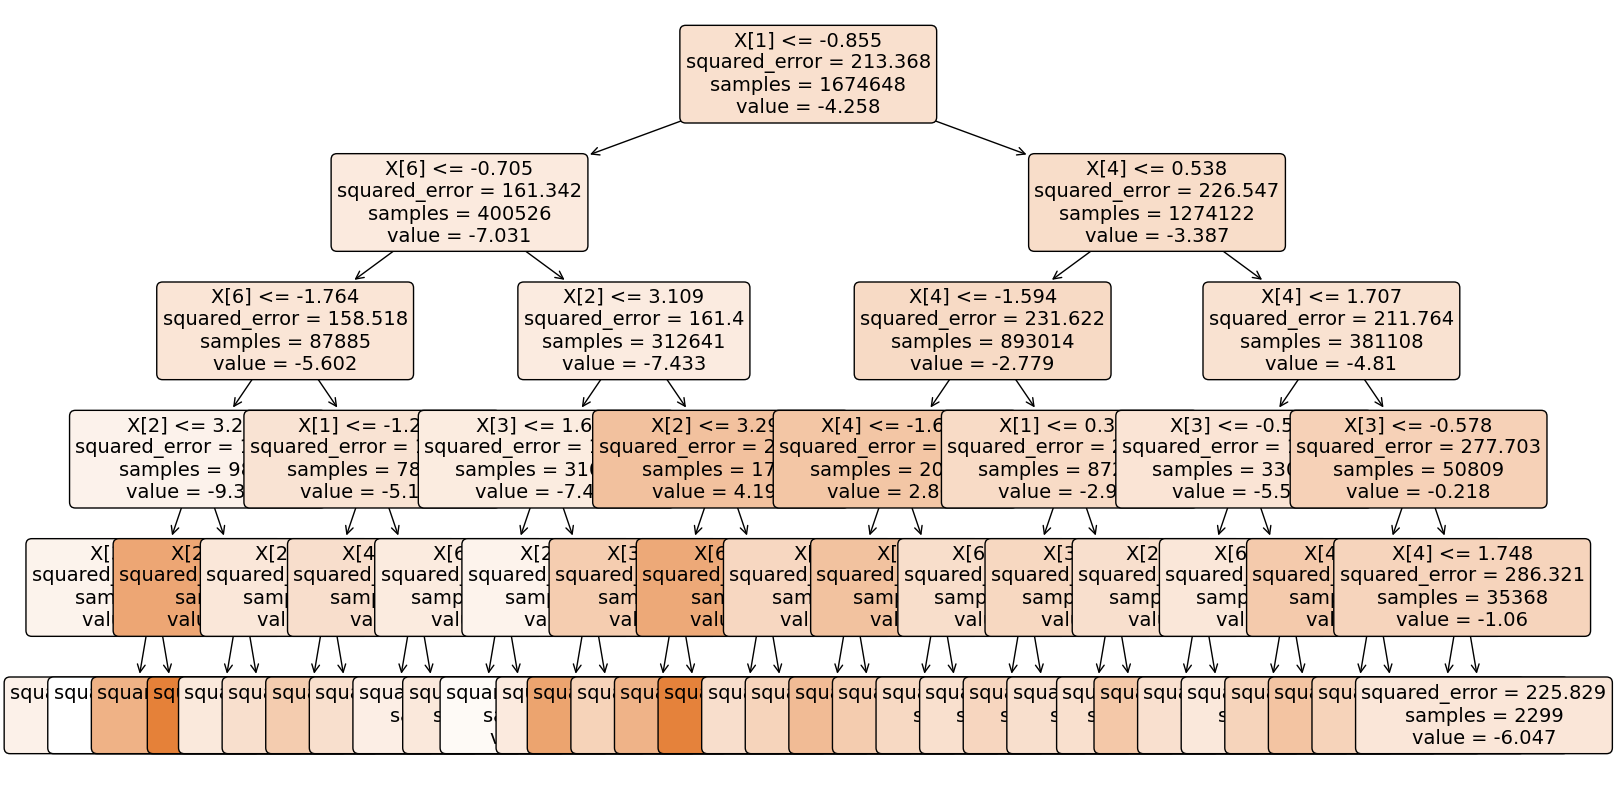

In [114]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(18, 10))
# _ = tree.plot_tree(model, 
#                    filled=True, rounded=True, fontsize=14)

In [150]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold

# parameters = [
#   {'max_depth': list(range(5, 15))},
#  ]

# cv = KFold(n_splits=5, shuffle=True, random_state=13)
# clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

# clf = clf.fit(X_train, y_train)
# print(clf.best_estimator_)
# print(clf.best_params_)

In [149]:
# ada boost and xg boost

In [18]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3)
rgr = AdaBoostRegressor(clf, n_estimators=5000)

rgr.fit(X_train, y_train)
rgr.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [16]:
from sklearn.metrics import mean_absolute_error

predicted = rgr.predict(X_test)
mean_absolute_error(predicted, y_test)

NameError: name 'rgr' is not defined

In [22]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(max_depth=8)
xgb_reg.fit(X_train, y_train)

/Users/dimitrisbouris/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
preds = xgb_reg.predict(X_test)
mean_absolute_error(y_test, preds)

4.504869914502504

In [24]:
xgb_reg.score(X_test, y_test)

0.8567569407361892

Text(0.5, 0, 'Actual')

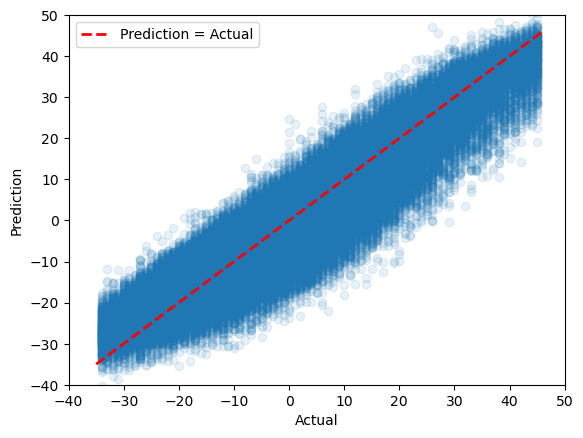

In [72]:
import matplotlib.pyplot as plt

fig = plt.scatter(y_test, preds, alpha=0.1)
plt.plot([-35, 46], [-35, 46], linestyle='--', lw=2, color='r', label='Prediction = Actual')
plt.legend()
plt.ylim(-40, 50)
plt.xlim(-40, 50)
plt.ylabel('Prediction')
plt.xlabel('Actual')
# plt.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]])

In [43]:
fig.get_ylim()

AttributeError: 'PathCollection' object has no attribute 'get_ylim'

In [ ]:
# read the needed columns from the fact table
fact = pd.read_csv('flights_fact.csv', usecols=['AIRLINE', 'scheduledDeparture_key', 
                                                'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY',
                                               'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'dateKey',
                                               'TAIL_NUMBER', 'DEPARTURE_DELAY', 'scheduledArrival_key',
                                               'SCHEDULED_TIME'], 
                   dtype={'dateKey':'str'})

# read the aircraft and time (departure and arrival) dimensions 
aircraft = pd.read_csv('aircraft_dim.csv', usecols=['N-Number', 'num_passengers', 'mfr_name'])
time1 = pd.read_csv('departureTime_dim.csv', usecols=['Hour', 'Minute', 'scheduledDeparture_key'])
time2 = pd.read_csv('arrivalTime_dim.csv', usecols=['Hour', 'Minute', 'scheduledArrival_key'])

# merge the above tables with the fact
fact = pd.merge(fact, time1, on='scheduledDeparture_key')
fact = pd.merge(fact, time2, on='scheduledArrival_key')

# keep only the top 15 airports and airlines to make the dataset manageable
top_15_airports = ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'SEA', 'MCO', 'LAS', 'CLT', 'EWR', 'PHX', 'IAH', 
                  'MIA']
fact = fact[(fact['ORIGIN_AIRPORT'].isin(top_15_airports)) & (fact['DESTINATION_AIRPORT'].isin(top_15_airports))]

# get dummy variables for the categorical ones
fact = pd.get_dummies(fact, columns=['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'mfr_name'])

# split the dataset in dependent and idependent variables
Y = fact['ARRIVAL_DELAY']
fact.drop(columns='ARRIVAL_DELAY', inplace=True)
X = fact

# get a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# train an xgb regressor
xgb_reg = xgb.XGBRegressor(max_depth=8)
xgb_reg.fit(X_train, y_train)